In [16]:
import pandas as pd
import os

client_path = './results/client_0.csv'
server_path = './results/server_0.csv'

client_df = pd.read_csv(client_path).drop(columns=['Unnamed: 0'])
server_df = pd.read_csv(server_path).drop(columns=['Unnamed: 0'])

In [31]:
merge_df = pd.merge(client_df, server_df, on='chunk_id')
merge_df['client_time'] = merge_df['t3'] - merge_df['t2']
merge_df['server_time'] = merge_df['t4'] - merge_df['t1']
merge_df

,chunk_id,t2,t3,decoding_time,chunk_size_x,t1,t4,encoding_time,chunk_size_y,client_time,server_time
0,0,1.701435e+09,1.701435e+09,0.011270,12226076,1.701435e+09,1.701435e+09,0.418908,12226076,0.019677,0.042970
1,1,1.701435e+09,1.701435e+09,0.011009,12142301,1.701435e+09,1.701435e+09,0.346689,12142301,0.007533,0.405796
2,2,1.701435e+09,1.701435e+09,0.011439,11618514,1.701435e+09,1.701435e+09,0.344015,11618514,0.006531,0.402772
3,3,1.701435e+09,1.701435e+09,0.011043,12137090,1.701435e+09,1.701435e+09,0.337275,12137090,0.006432,0.405918
4,4,1.701435e+09,1.701435e+09,0.009329,7851299,1.701435e+09,1.701435e+09,0.323936,7851299,0.002754,0.003419
...,...,...,...,...,...,...,...,...,...,...,...
116,116,1.701435e+09,1.701435e+09,0.010195,8099906,1.701435e+09,1.701435e+09,0.315100,8099906,0.002435,0.003617
117,117,1.701435e+09,1.701435e+09,0.009630,7003497,1.701435e+09,1.701435e+09,0.317847,7003497,0.002245,0.086909
118,118,1.701435e+09,1.701435e+09,0.011557,6455704,1.701435e+09,1.701435e+09,0.308045,6455704,0.002043,0.392332
119,119,1.701435e+09,1.701435e+09,0.010159,6609270,1.701435e+09,1.701435e+09,0.315772,6609270,0.002611,0.383816


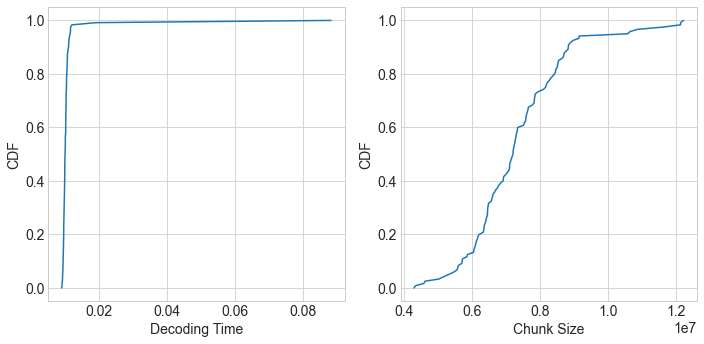

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Set the style to 'seaborn-whitegrid'
plt.style.use('seaborn-whitegrid')

# Set the global font size
plt.rcParams.update({'font.size': 14})

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot CDF of decoding_time
decoding_time_cdf = np.linspace(0, 1, len(merge_df['decoding_time']))
ax1.plot(np.sort(merge_df['decoding_time']), decoding_time_cdf)
ax1.set_xlabel('Decoding Time')
ax1.set_ylabel('CDF')

# Plot CDF of chunk_size_x
chunk_size_x_cdf = np.linspace(0, 1, len(merge_df['chunk_size_x']))
ax2.plot(np.sort(merge_df['chunk_size_x']), chunk_size_x_cdf)
ax2.set_xlabel('Chunk Size')
ax2.set_ylabel('CDF')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()